In [1]:
# Here is a crack at a choropleth map from the altair documentation.
# states is a built-in datastructure that contains the map, and
# statedata is a sequence of 50 random numbers that I will paint on the map.
# Altiar wants the map and the data in the same data structure, so we
# have to use transform_lookup (the equivalent of pd.join or VLOOKUP)
# to either merge the map into the data or the data into the map
# before there is enough data in one place to attempt a map

import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np
states = alt.topo_feature(data.us_10m.url, feature='states')  # This is the map
statedata = pd.DataFrame({"value":np.random.random(51)})      # This is bogus data
statedata["id"] = statedata.index
alt.Chart(states).mark_geoshape(
    stroke='white'
  ).encode(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(statedata, 'id', ["value"])
).project('albersUsa').properties(
    width=500,
    height=300
)

alt.Chart(...)

In [3]:
# That's nice.  But a little too blue. 
# Did I forget to specify .encode(color) ? 
states = alt.topo_feature(data.us_10m.url, feature='states')
statedata = pd.DataFrame({"value":np.random.random(51)})
statedata["id"] = statedata.index
alt.Chart(states).mark_geoshape(
    stroke='white'
  ).encode(color="value:Q"
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(statedata, 'id', ["value"])
).project('albersUsa').properties(
    width=500,
    height=300
)


alt.Chart(...)

In [4]:
# What's wrong with West Virginia, Virginia, Wyoming, and Washington?
# Oh, the map has more than 50 regions.  How am I supposed to put 
# state data in the right place?  
# Elsewhere in the documentation, the following toy dataset is used for 
# choropleth maps, and it seems to contain the  Statename -> magic map id number mapping

# I can open it in a browser if my browser has a JSON viewer plugin.

income = pd.read_json("https://vega.github.io/vega-datasets/data/income.json")

In [5]:
income.head()

,name,region,id,pct,total,group
0,Alabama,south,1,0.102,1837292,<10000
1,Alabama,south,1,0.072,1837292,10000 to 14999
2,Alabama,south,1,0.130,1837292,15000 to 24999
3,Alabama,south,1,0.115,1837292,25000 to 34999
4,Alabama,south,1,0.143,1837292,35000 to 49999


In [6]:
# It has lots of income data I don't care about, but it does have states and IDs.
decoder={}
for row in income.iloc():
    decoder[row["name"]] = row["id"]
print(decoder)

{'Alabama': 1, 'Alaska': 2, 'Arizona': 4, 'Arkansas': 5, 'California': 6, 'Colorado': 8, 'Connecticut': 9, 'Delaware': 10, 'District of Columbia': 11, 'Florida': 12, 'Georgia': 13, 'Hawaii': 15, 'Idaho': 16, 'Illinois': 17, 'Indiana': 18, 'Iowa': 19, 'Kansas': 20, 'Kentucky': 21, 'Louisiana': 22, 'Maine': 23, 'Maryland': 24, 'Massachusetts': 25, 'Michigan': 26, 'Minnesota': 27, 'Mississippi': 28, 'Missouri': 29, 'Montana': 30, 'Nebraska': 31, 'Nevada': 32, 'New Hampshire': 33, 'New Jersey': 34, 'New Mexico': 35, 'New York': 36, 'North Carolina': 37, 'North Dakota': 38, 'Ohio': 39, 'Oklahoma': 40, 'Oregon': 41, 'Pennsylvania': 42, 'Rhode Island': 44, 'South Carolina': 45, 'South Dakota': 46, 'Tennessee': 47, 'Texas': 48, 'Utah': 49, 'Vermont': 50, 'Virginia': 51, 'Washington': 53, 'West Virginia': 54, 'Wisconsin': 55, 'Wyoming': 56, 'Puerto Rico': 72}


In [7]:
print(len(decoder.values()))

52


In [8]:
# Ok, so it's DC and PR in this dataset, and there are gaps in the numbering where you 
# might expect American Samoa and Guam. 

In [9]:
# After fruitlessly searching the census website for 10 minutes, I got a 
# population chart from https://en.wikipedia.org/wiki/2010_United_States_census
# and as you will see, I will come to regret it.

population=pd.read_csv("state-population.csv")

In [10]:
population

,,,,,,Rank \tState\t2000 Population\t2010 Population\tChange \tPercent change
1 \tCalifornia \t33,871,648 \t37,253,956 \t3,382,308 Increase \t10.0% Increase
2 \tTexas \t20,851,820 \t25,145,561 \t4,293,741 Increase \t20.6% Increase
3 \tNew York \t18,976,457 \t19,378,102 \t401,645 Increase \t2.1% Increase,NaN
4 \tFlorida \t15,982,378 \t18,801,310 \t2,818,932 Increase \t17.6% Increase
5 \tIllinois \t12,419,293 \t12,830,632 \t411,339 Increase \t3.3% Increase,NaN
6 \tPennsylvania \t12,281,054 \t12,702,379 \t421,325 Increase \t3.4% Increase,NaN
7 \tOhio \t11,353,140 \t11,536,504 \t183,364 Increase \t1.6% Increase,NaN
8 \tMichigan \t9,938,444 \t9,883,640 \t−54,804 Decrease \t−0.6% Decrease,NaN
9 \tGeorgia \t8,186,453 \t9,687,653 \t1,501,200 Increase \t18.3% Increase
10 \tNorth Carolina \t8,049,313 \t9,535,483 \t1,486,170 Increase \t18.5% Increase


In [ ]:
# A word on separators.  Simple "flat" files have three puncuation marks:
# line separators, which ususally don't give trouble, 
# field separators like tab, space, and comma, and
# quotation marks.
# Q:  Why are the quotation marks necessary?
# A:  Because fields sometimes contain spaces, commas, tabs, or, sadly, newline characters.

In [ ]:
# An arcane piece of data lore for you: when you have to fit variable-length 
# data into a flat format (not something structured like XML or JSON),
# *put the variable-length field at the end of the line*.  One piece of very useful bioinformatics
# workhorse software for a long time used spaces as field separators and had one field
# that was allowed to contain spaces.  It was at the end of the line, so graduate students
# around the world wrote parsers that separated fields with the first 17 spaces and left 
# the remaining spaces in the 18th field.

In [11]:
# D'oh.  Set field separator to tab.
population=pd.read_csv("state-population.csv", sep="\t")
population

,Rank,State,2000 Population,2010 Population,Change,Percent change
0,1,California,"33,871,648","37,253,956","3,382,308 Increase",10.0% Increase
1,2,Texas,"20,851,820","25,145,561","4,293,741 Increase",20.6% Increase
2,3,New York,"18,976,457","19,378,102","401,645 Increase",2.1% Increase
3,4,Florida,"15,982,378","18,801,310","2,818,932 Increase",17.6% Increase
4,5,Illinois,"12,419,293","12,830,632","411,339 Increase",3.3% Increase
5,6,Pennsylvania,"12,281,054","12,702,379","421,325 Increase",3.4% Increase
6,7,Ohio,"11,353,140","11,536,504","183,364 Increase",1.6% Increase
7,8,Michigan,"9,938,444","9,883,640","−54,804 Decrease",−0.6% Decrease
8,9,Georgia,"8,186,453","9,687,653","1,501,200 Increase",18.3% Increase
9,10,North Carolina,"8,049,313","9,535,483","1,486,170 Increase",18.5% Increase


In [12]:
# You can't fool me, I've seen what commas do to the digestive system of a pandas.
# I will remove them and add them as new comma-free columns "2000" and "2010"
population["2000"] = population["2000 Population"].str.replace(",","")
population["2010"] = population["2010 Population"].str.replace(",","")
population.head()

,Rank,State,2000 Population,2010 Population,Change,Percent change,2000,2010
0,1,California,"33,871,648","37,253,956","3,382,308 Increase",10.0% Increase,33871648,37253956
1,2,Texas,"20,851,820","25,145,561","4,293,741 Increase",20.6% Increase,20851820,25145561
2,3,New York,"18,976,457","19,378,102","401,645 Increase",2.1% Increase,18976457,19378102
3,4,Florida,"15,982,378","18,801,310","2,818,932 Increase",17.6% Increase,15982378,18801310
4,5,Illinois,"12,419,293","12,830,632","411,339 Increase",3.3% Increase,12419293,12830632


In [13]:
population.sort_values("2010")

,Rank,State,2000 Population,2010 Population,Change,Percent change,2000,2010
42,43,Rhode Island,"1,048,319","1,052,567","4,248 Increase",0.4% Increase,1048319,1052567
6,7,Ohio,"11,353,140","11,536,504","183,364 Increase",1.6% Increase,11353140,11536504
5,6,Pennsylvania,"12,281,054","12,702,379","421,325 Increase",3.4% Increase,12281054,12702379
4,5,Illinois,"12,419,293","12,830,632","411,339 Increase",3.3% Increase,12419293,12830632
41,42,New Hampshire,"1,235,786","1,316,470","80,684 Increase",6.5% Increase,1235786,1316470
40,41,Maine,"1,274,923","1,328,361","53,438 Increase",4.2% Increase,1274923,1328361
39,40,Hawaii,"1,211,537","1,360,301","148,764 Increase",12.3% Increase,1211537,1360301
38,39,Idaho,"1,293,953","1,567,582","273,629 Increase",21.1% Increase,1293953,1567582
37,38,Nebraska,"1,711,263","1,826,341","115,078 Increase",6.7% Increase,1711263,1826341
36,37,West Virginia,"1,808,344","1,852,994","44,650 Increase",2.5% Increase,1808344,1852994


In [14]:
# Something is not right here.. my populations are sorted in alphabetical
# (jargon lexciographic) order.  Let us ignore that. 

In [15]:
cumulative = population.sort_values("2010")["2010"].cumsum()
cumulative

42                                             1052567 
6                                     1052567 11536504 
5                            1052567 11536504 12702379 
4                   1052567 11536504 12702379 12830632 
41          1052567 11536504 12702379 12830632 1316470 
40    1052567 11536504 12702379 12830632 1316470 132...
39    1052567 11536504 12702379 12830632 1316470 132...
38    1052567 11536504 12702379 12830632 1316470 132...
37    1052567 11536504 12702379 12830632 1316470 132...
36    1052567 11536504 12702379 12830632 1316470 132...
3     1052567 11536504 12702379 12830632 1316470 132...
2     1052567 11536504 12702379 12830632 1316470 132...
35    1052567 11536504 12702379 12830632 1316470 132...
1     1052567 11536504 12702379 12830632 1316470 132...
34    1052567 11536504 12702379 12830632 1316470 132...
33    1052567 11536504 12702379 12830632 1316470 132...
32    1052567 11536504 12702379 12830632 1316470 132...
31    1052567 11536504 12702379 12830632 1316470

In [16]:
# shouldn't have ignored that.  cumsum() is not summing numbers but concatenating
# strings.  

In [18]:
# Now really create numerical population columns
population["2000"] = pd.to_numeric(population["2000 Population"].str.replace(",",""))
population["2010"] = pd.to_numeric(population["2010 Population"].str.replace(",",""))


In [19]:
cumulative = population.sort_values("2010")["2010"].cumsum()
cumulative

50       563626
49      1165349
48      1791090
47      2463681
46      3173912
45      3988092
44      4886026
43      5875441
42      6928008
41      8244478
40      9572839
39     10933140
38     12500722
37     14327063
36     16180057
35     18239236
34     20939787
33     23703672
32     26556790
31     29472708
30     32440005
29     35486360
28     39060457
27     42811808
26     46642882
25     50982249
24     55515621
23     60140985
22     64920721
21     69949917
20     75253842
19     80940828
18     86714380
17     92703307
16     99049412
15    105441429
14    111925231
13    118472860
12    125197400
11    133198424
10    141990318
9     151525801
8     161213454
7     171097094
6     182633598
5     195335977
4     208166609
3     226967919
2     246346021
1     271491582
0     308745538
Name: 2010, dtype: int64

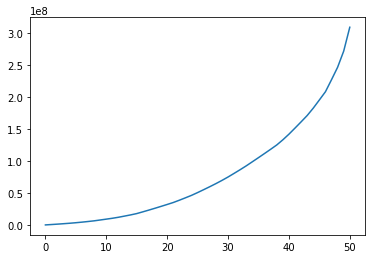

In [20]:
# This is better.  Let's plot it.
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(cumulative)), cumulative)

<BarContainer object of 51 artists>

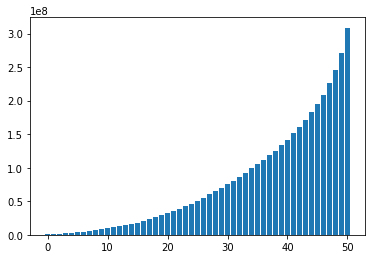

In [21]:
plt.bar(np.arange(len(cumulative)), cumulative)
# Note this graph, *because of the way we constructed it*, has
# "first-derivative-like" first differences positive and 
# "second-derivative-like" second differences also positive.
#  Eeenteresting.  Not suspicion-inspiring at all.

In [22]:
# so the middle value is 
cumulative[25]

50982249

In [23]:
# and the final value is 
cumulative[0]


308745538

In [ ]:
# Insert more-cattle-than-people joke here
cumulative[50]

In [24]:
# The fraction of the population in the smallest 26 states:
cumulative[25]/cumulative[0]

0.16512707950454655

In [ ]:
# I can't draw my population data on a map until I integrate the numerical 
# map IDs with the state name, and best practice when you have two pieces 
# of data in different data frames is to join them.  Let us examine our fields:

In [25]:
population.head(1)

,Rank,State,2000 Population,2010 Population,Change,Percent change,2000,2010
0,1,California,"33,871,648","37,253,956","3,382,308 Increase",10.0% Increase,33871648,37253956


In [26]:
income.head()

,name,region,id,pct,total,group
0,Alabama,south,1,0.102,1837292,<10000
1,Alabama,south,1,0.072,1837292,10000 to 14999
2,Alabama,south,1,0.130,1837292,15000 to 24999
3,Alabama,south,1,0.115,1837292,25000 to 34999
4,Alabama,south,1,0.143,1837292,35000 to 49999


In [27]:
# create a new column named "State" to facilitate joining 
# I could specify left-join-field and right-join-field but why?
income["State"] = income.name

In [28]:
population.join(income, on="State")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [29]:
# pd.join is complaining about data types.  Can I clean up the types?
population.State = population.State.astype(str)
income.State = income.State.astype(str)

In [30]:
population.join(income, on="State")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [31]:
# No that doesn't work ... seearch engine...  specify join fields with 
# DataFrame.set_index("fieldname")
population.set_index("State").join(income.set_index("State"))

,Rank,2000 Population,2010 Population,Change,Percent change,2000,2010,name,region,id,pct,total,group
State,,,,,,,,,,,,,
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,47,"626,932","710,231","83,299 Increase",13.3% Increase,626932,710231,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,16,"5,130,632","6,392,017","1,261,385 Increase",24.6% Increase,5130632,6392017,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,32,"2,673,400","2,915,918","242,518 Increase",9.1% Increase,2673400,2915918,NaN,NaN,NaN,NaN,NaN,NaN
California,1,"33,871,648","37,253,956","3,382,308 Increase",10.0% Increase,33871648,37253956,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,22,"4,301,261","5,029,196","727,935 Increase",16.9% Increase,4301261,5029196,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,29,"3,405,565","3,574,097","168,532 Increase",4.9% Increase,3405565,3574097,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,45,"783,600","897,934","114,334 Increase",14.6% Increase,783600,897934,NaN,NaN,NaN,NaN,NaN,NaN
District of Columbia,—,"572,059","601,723","29,664 Increase",5.2% Increase,572059,601723,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Wait a minute, that looked like it joined but it didn't.  Why could it 
# be that "California" does not join with "California" ?


In [33]:
print("*"+population.State[0]+"*")
print("*"+income.State[0]+"*")

*California *
*Alabama*


In [34]:
# That would do it.  population has trailing spaces in its state name column.
# Can I just use square bracket notation on population.State?
test = population.State[:-1]
print("*"+test[0]+"*")

*California *


In [ ]:
# apparently not.

In [35]:
# Can I use pd.Series.str and square brackets?
test = population.State.str[:-1]
print("*"+test[0]+"*")

*California*


In [36]:
# Yes, I can.  


In [37]:
population["State"] = population.State.str[:-1]
# I have to remember not to run that cell again or I'll be 
# vacationing in Michiga next summer.

In [38]:
# New dataframe joinpop, containing everything worthwhile from population and income:
joinpop = population.set_index("State").join(income.set_index("State"), how="left")
joinpop.shape

(510, 13)

In [39]:
# It's got ten data points for 51 states.. 
joinpop.head()

,Rank,2000 Population,2010 Population,Change,Percent change,2000,2010,name,region,id,pct,total,group
State,,,,,,,,,,,,,
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.102,1837292,<10000
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.072,1837292,10000 to 14999
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.130,1837292,15000 to 24999
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.115,1837292,25000 to 34999
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.143,1837292,35000 to 49999


In [42]:
# Add a Boolean column with "bigger or smaller than 26th smallest state"
joinpop["flag"] = (joinpop["2010"] <=population.loc[25]["2010"])

joinpop["flag"].value_counts()

True     260
False    250
Name: flag, dtype: int64

In [43]:
# including lots of duplicated population data.  (As long as I'm not summing it
# I should be fine.)
joinpop.id.dtype

dtype('int64')

In [44]:
income.id.dtype

dtype('int64')

In [45]:
joinpop

,Rank,2000 Population,2010 Population,Change,Percent change,2000,2010,name,region,id,pct,total,group,flag
State,,,,,,,,,,,,,,
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.102,1837292,<10000,False
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.072,1837292,10000 to 14999,False
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.130,1837292,15000 to 24999,False
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.115,1837292,25000 to 34999,False
Alabama,23,"4,447,100","4,779,736","332,636 Increase",7.5% Increase,4447100,4779736,Alabama,south,1,0.143,1837292,35000 to 49999,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,50,"493,782","563,626","69,844 Increase",14.1%,493782,563626,Wyoming,west,56,0.142,222679,75000 to 99999,True
Wyoming,50,"493,782","563,626","69,844 Increase",14.1%,493782,563626,Wyoming,west,56,0.196,222679,50000 to 74999,True
Wyoming,50,"493,782","563,626","69,844 Increase",14.1%,493782,563626,Wyoming,west,56,0.151,222679,100000 to 149999,True


In [46]:
joinpop.shape

(510, 14)

In [47]:
# Back to the map.  Merge joinpop.flag 

states = alt.topo_feature(data.us_10m.url, feature='states')
alt.Chart(states).mark_geoshape(
    stroke='white'
  ).encode(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(joinpop, 'id', ["flag"])
).project('albersUsa').properties(
    width=500,
    height=300
)

alt.Chart(...)

In [48]:
# Merge joinpop["flag" ]

states = alt.topo_feature(data.us_10m.url, feature='states')
alt.Chart(states).mark_geoshape(
    stroke='white'
  ).encode( 
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(joinpop, 'id', ["flag"])
).project('albersUsa').properties(
    width=500,
    height=300
)

alt.Chart(...)

In [49]:
# Include .encode(color=)

states = alt.topo_feature(data.us_10m.url, feature='states')
alt.Chart(states).mark_geoshape(
    stroke='white'
  ).encode( color=alt.Color("flag:N")
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(joinpop, 'id', ["flag"])
).project('albersUsa').properties(
    width=500,
    height=300
)

alt.Chart(...)

In [ ]:
# And I could fine-tune the colors and the labels and get rid of the missing values 
# for PR and DC but I'm ready to declare victory for today.

In [50]:
# We have the actual numbers, we could plot the population data itself, 
# not just a large-small marker:

states = alt.topo_feature(data.us_10m.url, feature='states')
alt.Chart(states).mark_geoshape(
    stroke='white'
  ).encode( color=alt.Color("2010:N")
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(joinpop, 'id', ["flag", "2010"])
).project('albersUsa').properties(
    width=500,
    height=300
)

alt.Chart(...)

In [51]:
# Ha, ha.  Not going to get full marks for that one. Population is not a categorical
# variable, and bad things happen if you instruct altair otherwise.  There are only 10
# colors, so each color appears 5 times.

In [52]:
# Population must be quantitative ":Q" in color specificaiton 
states = alt.topo_feature(data.us_10m.url, feature='states')
alt.Chart(states).mark_geoshape(
    stroke='white'
  ).encode( color=alt.Color("2010:Q")
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(joinpop, 'id', ["flag", "2010"])
).project('albersUsa').properties(
    width=500,
    height=300
)

alt.Chart(...)

In [ ]:
# Insert anti-Californian joke here, since they are eating most of the blue
# ink being a large state with 33 million people.

# What's the difference between an anti-Californian joke and an anti-Wyomingan joke?

In [53]:
population.loc[0]["2010"]/population.loc[50]["2010"]

66.09694371799739

In [ ]:
# The anti-Californian joke gets 60x more poeple mad at you.

In [54]:
# We need to add a title, and labels with state symbols would be nice.
states = alt.topo_feature(data.us_10m.url, feature='states')
alt.Chart(states, title="Pointless choropleth map: states by 2010 census population"
).mark_geoshape(
    stroke='white'
  ).encode( color=alt.Color("2010:Q")
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(joinpop, 'id', ["flag", "2010"])
).project('albersUsa').properties(
    width=500,
    height=300
)

alt.Chart(...)